## Observations and Insights 

In [ ]:
# SUMMARY OF STUDY RESULTS

# OBSERVATIONS FROM THIS STUDY

# 1. While it is not fully clear from the analysis we performed as to just how many observations it would take
#    to achieve statistical significance, it is evident that the study is fair.  There were an approximately equal
#    number of test subjects for each drug therapy as well as for the placebo group.  Further, across all drug
#    therapies tested, there were a nearly equal number of males and females.  We were also careful to exclude
#    fully redundant records, so as not to overweight by accident, in connection with a strong verification process.

# 2. Of the four most promising drug regimens, the box plot analysis provides a stark contrast in correlating
#    final tumor size and drug therapy.  Capomulin and Romicane clearly outperformed the other two therapies,
#    Ceftamin and Infubinol.  Only Infubinol had any outliers, in a single instance. The glaring weakness of 
#    this analysis is that we did not perform a similar spread analysis for beginning of period tumor size.
#    In other words, the tumor size starting positions may have been uneven.  

# 3. The line graph of an individual mouse's tumor size progress during therapeutic treatment by Capomulin is both
#    encouraging and possibly concerning.  While the beginning period and end period tumor sizes draws a strong
#    declining slope, indicating significant tumor size decrease, the track in the interim periods is anything
#    but smooth.  In fact, it wanders significantly, and concerningly peaks twice above the starting position
#    during the course of overall decline.  

# 4. It's not clear whether the scatter plot comparing mouse tumor size to mouse Weight demonstrates anything
#    other than that the average size of the tumor over the course of therapy seems to correlate positively
#    with the average weight of the individual.  In other words, the heavier the individual, the larger the 
#    tumor.  Not necessarily a surprise.  Moreover, when I think of cancer victims, I tend to think of images of
#    people (or animals).  When I think of health individuals, I think of robust people (or animals).  So, I
#    would imagine a good sign a cancer therapy is working is that when tumor size decreases, patient weight
#    would likely increase.  So, I observe that the data we have plotted is for average tumor size and average
#    patient weight.  So, our analysis doesn't capture before and after ratios, which could be more useful.  I 
#    also imagine that the study duration may not be long enough to capture the long-term negative correlation
#    if the cancer therapy is effective.  That does make one wonder about how indicative the above box plot 
#    analysis is, which we tentatively identified as encouraging.

# AREAS FOR FURTHER ANALYSIS OR VERIFICATION

# 1. It makes sense to perform further analysis to determine how many observations it would take to achieve 
#    statistical significance.

# 2. In this analysis, we did not test for distribution of males and females for each drug regimen.  The data is
#    there, so only the relatively brief time to do the analysis prevents us from doing so.

# 3. A better analysis of the four most promising drug regimens might be to compare distributions of percentage
#    decline in tumor size.  If x = starting tumor size, y = ending tumor size, the formula is (x-y)/x for each
#    mouse aggregated by specific drug therapy.

# 4. Although I was able to easily acquire upper and lower quartile values for each drug therapy using the groupby
#    method, I regret that I didn't better automate the extraction of those calculated values even when I had
#    converted the 2-value-index groupby object to a dataframe.  I was unable to figure out how to access index
#    field names to easily extact the upper and lower quartile values by drug therapy.  Consequently, I had to 
#    tediously use the .iloc method to extract these values to calculate IQR, as well as lower bounds and upper
#    bounds to use in connection with isolating outliers in the 4 studies of promising drugs.

# 5. The graphic tracking the progress of an individual mouse's tumor size warrants further study to map average 
#    progress not only for Capomulin but also for other drug regimens.  I strongly believe it is important to 
#    determine if this kind of chaotic progress track occurs often.  Imagine an oncologist telling a patient that 
#    it might get worse before it gets better.  It certainly could affect adoption if other drugs are less chaotic.

# 6. We might also suggest that future analysis incorporate clnician feedback as to tumor size or tumor size to 
#    patient weight ratios that meet remission thresholds, providing either it is already studied or there is 
#    corporate willingness and budget to pursue such.


In [1]:
%matplotlib notebook

# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [3]:
# Display the data table for preview
print()
print(f"Screening Data for Squamouse Cell Carcinoma (SCC)")
mouse_study_df.head()


Screening Data for Squamouse Cell Carcinoma (SCC)


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [4]:
# Calculate number of rows prior to row-level deduplication
mouse_ttl_rows = len(mouse_study_df.index)
mouse_ttl_rows

1893

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Use drop_duplicates with parameter subset, for keeping only last duplicated rows add
mouse_study_dedupe_df = mouse_study_df.drop_duplicates(subset=["Mouse ID","Timepoint"])

print()
print(f"Screening Data for Squamouse Cell Carcinoma (SCC) - Cleansed")
mouse_study_dedupe_df.head()


Screening Data for Squamouse Cell Carcinoma (SCC) - Cleansed


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [6]:
# Calculate number of rows after row-level deduplication
mouse_dedupe_ttl_rows = len(mouse_study_dedupe_df.index)
print(f"After deduplication, there are {mouse_dedupe_ttl_rows} rows in the dataset.")
print(f"The deduplication removed {mouse_ttl_rows - mouse_dedupe_ttl_rows} rows from the original data set.")

After deduplication, there are 1888 rows in the dataset.
The deduplication removed 5 rows from the original data set.


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# The first line of code declares the following logic:
#     If the a row has values for columns Mouse ID and Timepoint that are identical to those of another row, 
#     assign row value = True.
# The second line of code instructs the dataframe to serve up unique instances of duplicate rows, with a default
#     of selecting all but the first row of each grouping of duplicate rows.

has_duplicates = mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"])
duplicates = mouse_study_df[has_duplicates]

print()
print(f"Duplicate Rows Cleansed from Screening Data for Squamouse Cell Carcinoma (SCC)")
duplicates


Duplicate Rows Cleansed from Screening Data for Squamouse Cell Carcinoma (SCC)


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [8]:
# Checking the number of mice in the clean DataFrame.
# Should be equal to 249 mice identified with SCC tumor growth that were treated over 45 days
#     by different drug regimens

mice_in_study = mouse_study_dedupe_df["Mouse ID"].nunique()
mice_in_study 

249

In [9]:
# Identify Drug Regigmens
drugs_list = mouse_study_dedupe_df["Drug Regimen"].unique()
drugs_num = mouse_study_dedupe_df["Drug Regimen"].nunique()

print(f"In this study {mice_in_study} mice were identified with SCC tumor growth, treated for over 45 days by")
print(f"{drugs_num} different Drug Regimens for this study, including:\n")
print(*drugs_list, sep = ", ")
print()
print(f"Pymaceutical's drug of interest is Capomulin, which will be compared with other treatments.")

In this study 249 mice were identified with SCC tumor growth, treated for over 45 days by
10 different Drug Regimens for this study, including:

Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propriva, Naftisol

Pymaceutical's drug of interest is Capomulin, which will be compared with other treatments.


In [10]:
# Examine data types for the cleaned DataFrame
mouse_study_dedupe_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.


In [12]:
# *****IMPORTANT*****
# Apparently, I may have answered this question differently than was instructed.  BUT my response is that what was 
#     instructed, an average of tumor size by drug could have led to badly skewed analysis.  Instead, the only way
#     to meaningfully analyze the data is first to take an average of tumor size measurements for each mouse, and
#     then to roll those averages into a set from which a second average value is calculated.  

#     Here's why in simple terms.  Say for a specific drug study there were 10 tumor size measurements for one mouse 
#     and 2 measurements for another mouse.  The instructed approach says to take an average for all tumor measurements.
#     This means that the instructed approach would allow the first mouse's tumor measurements to have 10x the 
#     weighting of the second mouse's tumor measurements.  This just doesn't make logical sense.  The question is trying 
#     to get at the average tumor size for each mouse.  My methodology - taking an average of averages - weights each
#     mouse equally in calculating an average tumor for the mouse population within each specific drug study.

#     I replicated this Groupby methodology for subseqent calculations: median, variance, standard deviation, and SEM.

In [13]:
# Calculate Average for Tumor Volume by Drug Regimen 
# Using a 2-variable Groupby operation with Drug Regimen as primary cluster and Mouse ID as secondary cluster,
#    and a second 2-variable Groupby operation by Drug Regimen as primary cluster and Tumor Volume as secondary field,
#    we were able to calculate average tumor size per mouse, and then roll up an average for each group of mice
#    subjected to a specific drug regimen.
# Method: groups using average of averages

avg_tumor_volume_by_drug = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .mean()
avg_tumor_volume_by_drug

Drug Regimen
Capomulin    40.755487
Ceftamin     50.827485
Infubinol    51.383443
Ketapril     53.432527
Naftisol     52.499395
Placebo      52.540611
Propriva     50.613641
Ramicane     40.555988
Stelasyn     52.662319
Zoniferol    51.562955
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Show the base groupby object - with Drug Regimen master cluster and Mouse ID slave cluster
tumor_volume_by_drug_avg_for_mouse = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"]) \
     .mean()
tumor_volume_by_drug_avg_for_mouse

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse ID                                                          
Capomulin    b128             9.0        22.0       22.5           41.963636   
             b742             7.0        21.0       22.5           40.083699   
             f966            16.0        17.0       10.0           36.505973   
             g288             3.0        19.0       22.5           41.990097   
             g316            22.0        22.0       22.5           44.613344   
...                           ...         ...        ...                 ...   
Zoniferol    q633            12.0        25.0       22.5           56.124896   
             s337            14.0        27.0       22.5           51.515155   
             w140            19.0        30.0        2.5           46.358976   
             w575            16.0        28.0       22.5           56.627561   
             x613             2.0        29.0        7.5           46.498216   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Capomulin    b128                   0.7  
             b742                   0.0  
             f966                   0.0  
             g288                   0.8  
             g316                   1.0  
...                                 ...  
Zoniferol    q633                   0.9  
             s337                   1.7  
             w140                   0.0  
             w575                   1.4  
             x613                   0.0  

[249 rows x 5 columns]

In [15]:
# Calculate Median for Tumor Volume by Drug Regimen
# Method: groups using median of averages
median_tumor_volume_by_drug = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .median()
median_tumor_volume_by_drug

Drug Regimen
Capomulin    41.384825
Ceftamin     52.128041
Infubinol    51.897959
Ketapril     53.725479
Naftisol     53.353053
Placebo      53.392180
Propriva     49.923649
Ramicane     40.108578
Stelasyn     52.651204
Zoniferol    52.437635
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculate Variance for Tumor Volume by Drug Regimen
# Method: groups using variance of averages
var_tumor_volume_by_drug = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .var()
var_tumor_volume_by_drug

Drug Regimen
Capomulin    10.529290
Ceftamin     14.040506
Infubinol    17.380408
Ketapril     24.086484
Naftisol     22.886774
Placebo      19.610351
Propriva     15.402512
Ramicane     10.256711
Stelasyn     22.147071
Zoniferol    16.782584
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Calculate Standard Deviation for Tumor Volume by Drug Regimen
# Method: groups using standard deviation of averages
std_tumor_volume_by_drug = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .std()
std_tumor_volume_by_drug

Drug Regimen
Capomulin    3.244887
Ceftamin     3.747066
Infubinol    4.168982
Ketapril     4.907798
Naftisol     4.784012
Placebo      4.428358
Propriva     3.924603
Ramicane     3.202610
Stelasyn     4.706067
Zoniferol    4.096655
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Calculate Standard Error from the Mean (SEM) for Tumor Volume by Drug Regimen
# Method: groups using SEM of averages
sem_tumor_volume_by_drug = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .sem()
sem_tumor_volume_by_drug

Drug Regimen
Capomulin    0.648977
Ceftamin     0.749413
Infubinol    0.833796
Ketapril     0.981560
Naftisol     0.956802
Placebo      0.885672
Propriva     0.784921
Ramicane     0.640522
Stelasyn     0.960622
Zoniferol    0.819331
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Calculate the number of mice (unique) involved in each Drug Regimen study
mice_count_by_drug = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .count()
mice_count_by_drug

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Tumor Volume (mm3), dtype: int64

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# I added mice count to the summary table.
# Assemble the resulting series into a single summary dataframe.
# Create data frame with obtained values
tumor_vol_summary_df = pd.DataFrame({"Tumor Vol Avg": avg_tumor_volume_by_drug, 
                                     "Tumor Vol Median": median_tumor_volume_by_drug,
                                     "Tumor Vol Var": var_tumor_volume_by_drug,
                                     "Tumor Vol StD": std_tumor_volume_by_drug,
                                     "Tumor Vol SEM": sem_tumor_volume_by_drug,
                                     "Mice Count": mice_count_by_drug})

print(f"Analysis of SCC Tumor Volume (mm3) by Drug Regimen\n")
print(f"Variance measures the spread between numbers in a data set.")
print(f"Standard Deviation (StD) provides a 'standard' way of knowing what is normal and what is not in a numbers spread.")
print(f"Standard Error from the Mean (SEM) is similar to StD, but tells how far a sample  mean might deviate from a population mean.")

tumor_vol_summary_df

Analysis of SCC Tumor Volume (mm3) by Drug Regimen

Variance measures the spread between numbers in a data set.
Standard Deviation (StD) provides a 'standard' way of knowing what is normal and what is not in a numbers spread.
Standard Error from the Mean (SEM) is similar to StD, but tells how far a sample  mean might deviate from a population mean.


Tumor Vol Avg  Tumor Vol Median  Tumor Vol Var  Tumor Vol StD  \
Drug Regimen                                                                  
Capomulin         40.755487         41.384825      10.529290       3.244887   
Ceftamin          50.827485         52.128041      14.040506       3.747066   
Infubinol         51.383443         51.897959      17.380408       4.168982   
Ketapril          53.432527         53.725479      24.086484       4.907798   
Naftisol          52.499395         53.353053      22.886774       4.784012   
Placebo           52.540611         53.392180      19.610351       4.428358   
Propriva          50.613641         49.923649      15.402512       3.924603   
Ramicane          40.555988         40.108578      10.256711       3.202610   
Stelasyn          52.662319         52.651204      22.147071       4.706067   
Zoniferol         51.562955         52.437635      16.782584       4.096655   

              Tumor Vol SEM  Mice Count  
Drug Regimen                             
Capomulin          0.648977          25  
Ceftamin           0.749413          25  
Infubinol          0.833796          25  
Ketapril           0.981560          25  
Naftisol           0.956802          25  
Placebo            0.885672          25  
Propriva           0.784921          25  
Ramicane           0.640522          25  
Stelasyn           0.960622          24  
Zoniferol          0.819331          25

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#      for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_summary_df2 = mouse_study_dedupe_df \
     .groupby(["Drug Regimen", "Mouse ID"], as_index=False) \
     .mean() \
     .groupby("Drug Regimen")["Tumor Volume (mm3)"] \
     .aggregate(["mean", "median", "var", "std", "sem", "count"])

print()
print(f"Analysis of SCC Tumor Volume (mm3) by Drug Regimen - Using .aggregate() Method")
tumor_vol_summary_df2


Analysis of SCC Tumor Volume (mm3) by Drug Regimen - Using .aggregate() Method


mean     median        var       std       sem  count
Drug Regimen                                                            
Capomulin     40.755487  41.384825  10.529290  3.244887  0.648977     25
Ceftamin      50.827485  52.128041  14.040506  3.747066  0.749413     25
Infubinol     51.383443  51.897959  17.380408  4.168982  0.833796     25
Ketapril      53.432527  53.725479  24.086484  4.907798  0.981560     25
Naftisol      52.499395  53.353053  22.886774  4.784012  0.956802     25
Placebo       52.540611  53.392180  19.610351  4.428358  0.885672     25
Propriva      50.613641  49.923649  15.402512  3.924603  0.784921     25
Ramicane      40.555988  40.108578  10.256711  3.202610  0.640522     25
Stelasyn      52.662319  52.651204  22.147071  4.706067  0.960622     24
Zoniferol     51.562955  52.437635  16.782584  4.096655  0.819331     25

In [22]:
tumor_vol_summary_df2.dtypes

mean      float64
median    float64
var       float64
std       float64
sem       float64
count       int64
dtype: object

## Bar and Pie Charts

In [23]:
# Matplotlib's pyplot is the library that Pandas uses in its plot function. 
# Pandas' DataFrame.plot() is only a convenient shortcut. 

# "Matplotlib is a Python package that is widely used throughout the scientific Python community 
# to create high-quality and publication-ready graphics. It supports a wide range of raster and 
# vector graphics formats including PNG, PostScript, EPS, PDF and SVG.  Moreover, matplotlib is the 
# actual engine behind the plotting capabilities of both Pandas and plotnine packages. For example, 
# when we call the .plot method on Pandas data objects, we actually use the matplotlib package."

# https://datacarpentry.org/python-ecology-lesson/08-putting-it-all-together/index.html

<IPython.core.display.Javascript object>


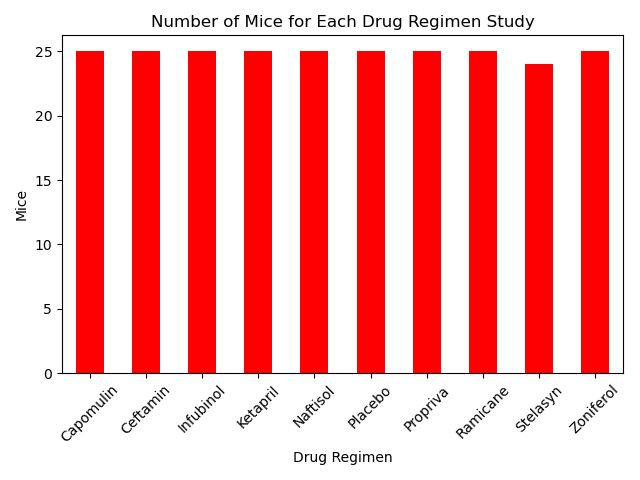

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
ax = tumor_vol_summary_df2.plot.bar(y=["count"], color="r", align="center", title="Number of Mice for Each Drug Regimen Study")
ax.set_ylabel("Mice")
plt.xticks(rotation=45)
plt.gca().get_legend().remove()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


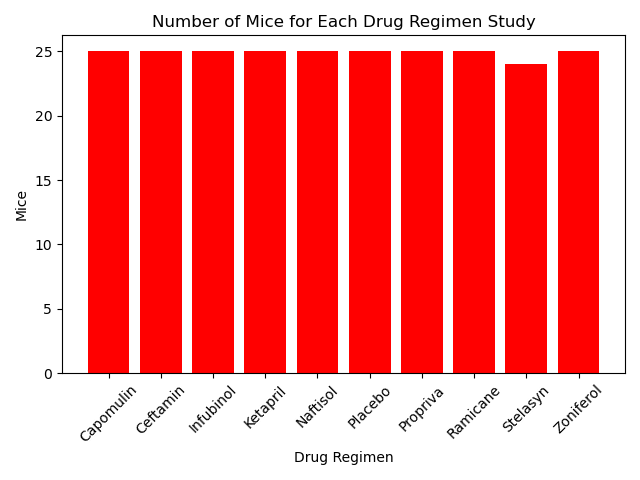

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Assign dataframe column values to graph labels and values
drug_xlabel = tumor_vol_summary_df2.index.values.tolist() 
mice_count_by_drug = tumor_vol_summary_df2["count"]

fig2, ax2 = plt.subplots()

# Create the bar plot
plt.bar(drug_xlabel, mice_count_by_drug, color ='red') 

# Label and further format
plt.xlabel("Drug Regimen") 
plt.ylabel("Mice") 
plt.title("Number of Mice for Each Drug Regimen Study") 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

In [26]:
# Calculate sex distibution of mouse population
mouse_sex_df = mouse_study_dedupe_df[["Mouse ID", "Sex"]]
mouse_sex_dedupe_df = mouse_sex_df.drop_duplicates(subset=["Mouse ID"])
mice_count_by_sex = mouse_sex_dedupe_df["Sex"].value_counts()
mice_count_by_sex_df = pd.DataFrame(mice_count_by_sex).reset_index()
mice_count_by_sex_df = mice_count_by_sex_df.rename(columns={"index": "Sex", "Sex": "Count"})
mice_count_by_sex_df = mice_count_by_sex_df.sort_values(by=["Sex"]).reset_index(drop=True)
mice_count_by_sex_df

Sex  Count
0  Female    124
1    Male    125

In [27]:
# Double-check on sex distibution of mouse population
mouse_sex_group = mouse_sex_dedupe_df.groupby("Sex").count()
mouse_sex_group_df = mouse_sex_group.rename(columns={"Mouse ID": "Count"})
mouse_sex_group_df = mouse_sex_group_df.reset_index()
mouse_sex_group_df

Sex  Count
0  Female    124
1    Male    125

In [28]:
males = mice_count_by_sex_df.iloc[1,1]
females = mice_count_by_sex_df.iloc[0,1]
print(f"Male Mice = {males}")
print(f"Female Mice = {females}")

Male Mice = 125
Female Mice = 124


<IPython.core.display.Javascript object>


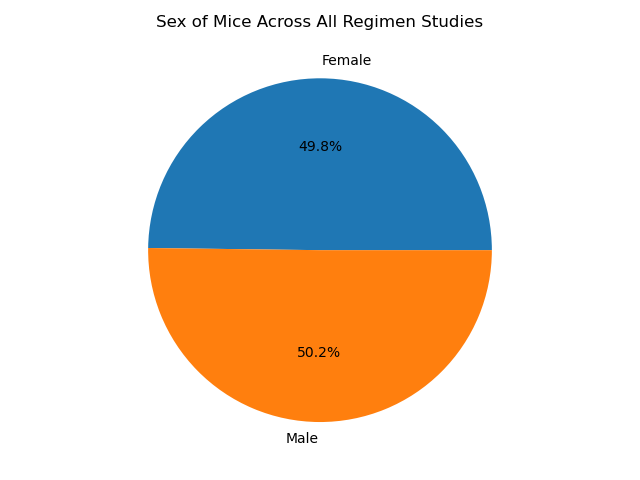

<ipython-input-29-d9583a4aa58c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = plt.axes()


In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count_by_sex_df2 = mice_count_by_sex_df.set_index("Sex")

ax3= mice_count_by_sex_df2.plot.pie(y="Count", title="Sex of Mice Across All Regimen Studies", \
                                     autopct='%1.1f%%', startangle=0)
# Label and further format
ax3 = plt.axes()
ax3.yaxis.label.set_visible(False)
ax3.get_legend().remove()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


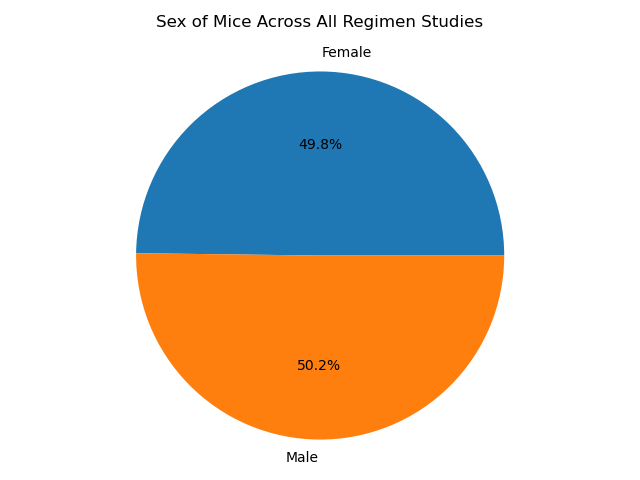

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sex_labels = mice_count_by_sex_df["Sex"]
sex_values = mice_count_by_sex_df["Count"]

fig4, ax4 = plt.subplots()

ax4.pie(sex_values, labels=sex_labels, autopct='%1.1f%%', startangle=0)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Label and further format
plt.title("Sex of Mice Across All Regimen Studies\n") 
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Extract a dataframe that includes only rows (records) of data for 4 promising drug regimens
# Use .isin() filter method with a "white" list of the 4 promising drugs (promising_drugs)

# Put treatments into a list for for loop (and later for plot labels)
promising_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

mouse_study_promising_drugs_df = mouse_study_dedupe_df.loc[mouse_study_dedupe_df["Drug Regimen"].isin(promising_drugs)]

print()
print(f"Source Data for Only the Four Most Promising Drug Therapies")
mouse_study_promising_drugs_df.head()


Source Data for Only the Four Most Promising Drug Therapies


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [32]:
#Check data types
mouse_study_promising_drugs_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [33]:
# INSTRUCTION: Start by getting the last (greatest) timepoint for each mouse

# Extract latest (max) values for the Timepoint column by Drug Regimen (master grouping) and Mouse ID (grouping next level down)
# Then reset the index (Drug Regimen and Mouse ID)
max_time_by_mouse_for_prom_drug = mouse_study_dedupe_df \
                                            .groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max() \
                                            .reset_index()

print()
print(f"Maximum Timepoints for Each Mouse in Each of the Drug Regimen Studies")
max_time_by_mouse_for_prom_drug.head()


Maximum Timepoints for Each Mouse in Each of the Drug Regimen Studies


Drug Regimen Mouse ID  Timepoint
0    Capomulin     b128         45
1    Capomulin     b742         45
2    Capomulin     f966         20
3    Capomulin     g288         45
4    Capomulin     g316         45

In [34]:
# INSTRUCTION: Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Used inner merge method to extract only rows of master dataframe named "Source Data for Only
#     the Four Most Promising Drug Therapies" with identically matching rows (all 3 columns) of
#     the dataframe named "Maximum Timepoints for Each Mouse in Each of the Drug Regimen Studies"

df1 = mouse_study_promising_drugs_df
df2 = max_time_by_mouse_for_prom_drug
df = df1.merge(df2, on=["Drug Regimen","Mouse ID", "Timepoint"])

# Rename column header Timepoint to Max Timepoint, etc.
df = df.rename(columns={"Timepoint": "Max Timepoint", "Age_months": "Age (mos)", "Tumor Volume (mm3)": "Final TumorVol (mm3)"})

# Move Drug Regimen column to first position in table
df = df[["Drug Regimen", "Mouse ID", "Final TumorVol (mm3)", "Metastatic Sites", "Sex", "Age (mos)", \
         "Weight (g)", "Max Timepoint"]]

# Sort by Drug Regimen and Mouse ID, in that order of importance
df = df.sort_values(by=["Drug Regimen", "Mouse ID"]) #.reset_index()

# Rename dataframe
final_tum_vol_by_mouse_by_prom_drug_df = df

print()
print(f"Final Tumor Volume for Each Mouse in Each of the Drug Regimen Studies")
final_tum_vol_by_mouse_by_prom_drug_df.head()


Final Tumor Volume for Each Mouse in Each of the Drug Regimen Studies


Drug Regimen Mouse ID  Final TumorVol (mm3)  Metastatic Sites     Sex  \
31    Capomulin     b128             38.982878                 2  Female   
30    Capomulin     b742             38.939633                 0    Male   
6     Capomulin     f966             30.485985                 0    Male   
24    Capomulin     g288             37.074024                 1    Male   
37    Capomulin     g316             40.159220                 2  Female   

    Age (mos)  Weight (g)  Max Timepoint  
31          9          22             45  
30          7          21             45  
6          16          17             20  
24          3          19             45  
37         22          22             45

In [35]:
# A somewhat more elegant way of presenting the same information as above
# Groupby insists on calculating some value (min, max, mean, var, std, count, etc.) in order to cluster
# But I didn't need to calcuate any of these values for the purposes of presentation.
# However, all rows show records only for a single point in time, the maximum Timepoint.
# All string value columns are clustered as an index of sorts.
# The remaining columns are numerical values.
# And each row (as clustered by drug and mouse) is unique.
# As such, running a mean, median, mode, max, min calculation simply returns the existing value.
# So I chose mean out of convenience.
# And this groupby output format provides an elegant view of the data organized by the nested variables /
# column values for Drug Regimen and Mouse ID

final_tum_vol_by_mouse_by_prom_drug_group = final_tum_vol_by_mouse_by_prom_drug_df.groupby(["Drug Regimen", "Mouse ID"]).mean()
final_tum_vol_by_mouse_by_prom_drug_group

Final TumorVol (mm3)  Metastatic Sites  Age (mos)  \
Drug Regimen Mouse ID                                                      
Capomulin    b128                 38.982878                 2          9   
             b742                 38.939633                 0          7   
             f966                 30.485985                 0         16   
             g288                 37.074024                 1          3   
             g316                 40.159220                 2         22   
...                                     ...               ...        ...   
Ramicane     s508                 30.276232                 0          1   
             u196                 40.667713                 3         18   
             w678                 43.166373                 0          5   
             y449                 44.183451                 0         19   
             z578                 30.638696                 0         11   

                       Weight (g)  Max Timepoint  
Drug Regimen Mouse ID                             
Capomulin    b128              22             45  
             b742              21             45  
             f966              17             20  
             g288              19             45  
             g316              22             45  
...                           ...            ...  
Ramicane     s508              17             45  
             u196              25             45  
             w678              24              5  
             y449              24             15  
             z578              16             45  

[100 rows x 5 columns]

In [36]:
# For convenience, I shorten / rename DataFrame that is product of filtering, sorting, refining, etc. 
# These hold effectively the same information, one as a dataframe, the other as a groupby object

study1_df = final_tum_vol_by_mouse_by_prom_drug_df
study2_df = final_tum_vol_by_mouse_by_prom_drug_group

In [37]:
# INSTRUCTION: Put treatments into a list for for loop (and later for plot labels)
# COMMENT: I had already done this earlier, so I am simply printing the named variable and a list of its values

print(promising_drugs)

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [38]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [39]:
study_quartiles_group = study1_df.groupby("Drug Regimen")["Final TumorVol (mm3)"].quantile([.25,.5,.75])
study_quartiles_df = pd.DataFrame(study_quartiles_group)
study_quartiles_df = study_quartiles_df.rename(columns={"Final TumorVol (mm3)": "Final TumorVol Quartile Cuts"})
study_quartiles_df

Final TumorVol Quartile Cuts
Drug Regimen                                   
Capomulin    0.25                     32.377357
             0.50                     38.125164
             0.75                     40.159220
Ceftamin     0.25                     48.722078
             0.50                     59.851956
             0.75                     64.299830
Infubinol    0.25                     54.048608
             0.50                     60.165180
             0.75                     65.525743
Ramicane     0.25                     31.560470
             0.50                     36.561652
             0.75                     40.659006

In [40]:
# Calculate the Upper and Lower Quartiles for each Drug Regimen
capomulin_lowerq = study_quartiles_df.iloc[0,0]
capomulin_upperq = study_quartiles_df.iloc[2,0]
ceftamin_lowerq = study_quartiles_df.iloc[3,0]
ceftamin_upperq = study_quartiles_df.iloc[5,0]
infubinol_lowerq = study_quartiles_df.iloc[6,0]
infubinol_upperq = study_quartiles_df.iloc[8,0]
ramicane_lowerq = study_quartiles_df.iloc[9,0]
ramicane_upperq = study_quartiles_df.iloc[11,0]

print(f"The lower and upper quartiles of Tumor Volume (mm3) in the Capomulin Study are {capomulin_lowerq} and {capomulin_upperq}")
print(f"The lower and upper quartiles of Tumor Volume (mm3) in the Ceftamin Study are {ceftamin_lowerq} and {ceftamin_upperq}")
print(f"The lower and upper quartiles of Tumor Volume (mm3) in the Infubinol Study are {infubinol_lowerq} and {infubinol_upperq}")
print(f"The lower and upper quartiles of Tumor Volume (mm3) in the Ramicane Study are {ramicane_lowerq} and {ramicane_upperq}")

The lower and upper quartiles of Tumor Volume (mm3) in the Capomulin Study are 32.37735684 and 40.1592203
The lower and upper quartiles of Tumor Volume (mm3) in the Ceftamin Study are 48.72207785 and 64.29983003
The lower and upper quartiles of Tumor Volume (mm3) in the Infubinol Study are 54.04860769 and 65.52574285
The lower and upper quartiles of Tumor Volume (mm3) in the Ramicane Study are 31.56046955 and 40.65900627


In [41]:
# Calculate the IQR for each Drug Regimen
capomulin_iqr = capomulin_upperq - capomulin_lowerq
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
infubinol_iqr = infubinol_upperq - infubinol_lowerq
ramicane_iqr = ramicane_upperq - ramicane_lowerq

print(f"The IQR of Tumor Volume (mm3) in the Capomulin Study is {capomulin_iqr}")
print(f"The IQR of Tumor Volume (mm3) in the Ceftamin Study is {ceftamin_iqr}")
print(f"The IQR of Tumor Volume (mm3) in the Infubinol Study is {infubinol_iqr}")
print(f"The IQR of Tumor Volume (mm3) in the Ramicane Study is {ramicane_iqr}")

The IQR of Tumor Volume (mm3) in the Capomulin Study is 7.781863460000004
The IQR of Tumor Volume (mm3) in the Ceftamin Study is 15.577752179999997
The IQR of Tumor Volume (mm3) in the Infubinol Study is 11.477135160000003
The IQR of Tumor Volume (mm3) in the Ramicane Study is 9.098536719999998


In [42]:
# Calculate the Upper and Lower Bounds for each Drug Regimen
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"The lower and upper bounds of Tumor Volume (mm3) in the Capomulin Study are {capomulin_lower_bound} and {capomulin_upper_bound}")
print(f"The lower and upper bounds of Tumor Volume (mm3) in the Ceftamin Study are {ceftamin_lower_bound} and {ceftamin_upper_bound}")
print(f"The lower and upper bounds of Tumor Volume (mm3) in the Infubinol Study are {infubinol_lower_bound} and {infubinol_upper_bound}")
print(f"The lower and upper bounds of Tumor Volume (mm3) in the Ramicane Study are {ramicane_lower_bound} and {ramicane_upper_bound}")

The lower and upper bounds of Tumor Volume (mm3) in the Capomulin Study are 20.70456164999999 and 51.83201549
The lower and upper bounds of Tumor Volume (mm3) in the Ceftamin Study are 25.355449580000002 and 87.66645829999999
The lower and upper bounds of Tumor Volume (mm3) in the Infubinol Study are 36.83290494999999 and 82.74144559000001
The lower and upper bounds of Tumor Volume (mm3) in the Ramicane Study are 17.912664470000003 and 54.30681135


In [43]:
# For convenience, providing a simplifieed name for the next set of calculations
df01 = final_tum_vol_by_mouse_by_prom_drug_df

# Locate the rows which contain mice on each drug and get the tumor volumes
# Use .loc method to extract rows with Final Tumor Volume values by each Drug Regimen

capomulin_study_df = df01.loc[df01["Drug Regimen"] == "Capomulin"]
ceftamin_study_df = df01.loc[df01["Drug Regimen"] == "Ceftamin"]
infubinol_study_df = df01.loc[df01["Drug Regimen"] == "Infubinol"]
ramicane_study_df = df01.loc[df01["Drug Regimen"] == "Ramicane"]

In [44]:
# Test Capomulin Mouse Study for Final Tumor Volume Outliers
capomulin_outliers_df = \
    capomulin_study_df[(capomulin_study_df["Final TumorVol (mm3)"] > capomulin_upper_bound) | \
                       (capomulin_study_df["Final TumorVol (mm3)"] < capomulin_lower_bound)]
if df.empty:
    print('DataFrame is empty!')
else:
    print(capomulin_outliers_df)

Empty DataFrame
Columns: [Drug Regimen, Mouse ID, Final TumorVol (mm3), Metastatic Sites, Sex, Age (mos), Weight (g), Max Timepoint]
Index: []


In [45]:
# Test Ceftamin Mouse Study for Final Tumor Volume Outliers
ceftamin_outliers_df = \
    ceftamin_study_df[(ceftamin_study_df["Final TumorVol (mm3)"] > ceftamin_upper_bound) | \
                       (ceftamin_study_df["Final TumorVol (mm3)"] < ceftamin_lower_bound)]
if df.empty:
    print('DataFrame is empty!')
else:
    print(ceftamin_outliers_df)

Empty DataFrame
Columns: [Drug Regimen, Mouse ID, Final TumorVol (mm3), Metastatic Sites, Sex, Age (mos), Weight (g), Max Timepoint]
Index: []


In [46]:
# Test Infubinol Mouse Study for Final Tumor Volume Outliers
infubinol_outliers_df = \
    infubinol_study_df[(infubinol_study_df["Final TumorVol (mm3)"] > infubinol_upper_bound) | \
                       (infubinol_study_df["Final TumorVol (mm3)"] < infubinol_lower_bound)]
if df.empty:
    print('DataFrame is empty!')
else:
    print(infubinol_outliers_df)

   Drug Regimen Mouse ID  Final TumorVol (mm3)  Metastatic Sites     Sex  \
58    Infubinol     c326             36.321346                 0  Female   

    Age (mos)  Weight (g)  Max Timepoint  
58         18          25              5  


In [47]:
# Test Ramicane Mouse Study for Final Tumor Volume Outliers
ramicane_outliers_df = \
    ramicane_study_df[(ramicane_study_df["Final TumorVol (mm3)"] > ramicane_upper_bound) | \
                       (ramicane_study_df["Final TumorVol (mm3)"] < ramicane_lower_bound)]
if df.empty:
    print('DataFrame is empty!')
else:
    print(ramicane_outliers_df)

Empty DataFrame
Columns: [Drug Regimen, Mouse ID, Final TumorVol (mm3), Metastatic Sites, Sex, Age (mos), Weight (g), Max Timepoint]
Index: []


In [48]:
# INSTRUCTION: Calculate the IQR and quantitatively determine if there are any potential outliers. 
#              Determine outliers using upper and lower bounds

# OBSERVATION: Only one outlier surfaced.  It occurred in the Infinol SCC Study.  It was Mouse ID c326.
#     The record (row) was printed out above.    

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [50]:
capomulin_data = capomulin_study_df["Final TumorVol (mm3)"]
capomulin_data.reset_index(drop=True, inplace=True)
capomulin_data.head()

0    38.982878
1    38.939633
2    30.485985
3    37.074024
4    40.159220
Name: Final TumorVol (mm3), dtype: float64

In [51]:
capomulin_data.count()

25

In [52]:
ceftamin_data = ceftamin_study_df["Final TumorVol (mm3)"]
ceftamin_data.reset_index(drop=True, inplace=True)
ceftamin_data.head()

0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Final TumorVol (mm3), dtype: float64

In [53]:
ceftamin_data.count()

25

In [54]:
infubinol_data = infubinol_study_df["Final TumorVol (mm3)"]
infubinol_data.reset_index(drop=True, inplace=True)
infubinol_data.head()

0    67.973419
1    65.525743
2    57.031862
3    66.083066
4    72.226731
Name: Final TumorVol (mm3), dtype: float64

In [55]:
infubinol_data.count()

25

In [56]:
ramicane_data = ramicane_study_df["Final TumorVol (mm3)"]
ramicane_data.reset_index(drop=True, inplace=True)
ramicane_data.head()

0    38.407618
1    43.047543
2    38.810366
3    32.978522
4    38.342008
Name: Final TumorVol (mm3), dtype: float64

In [57]:
ramicane_data.count()

25

In [58]:
# Create data frame with Final Tumor Volume values for each Drug Regimen
promising_merge_df = pd.DataFrame({"Capomulin": capomulin_data, 
                                   "Ceftamin": ceftamin_data,
                                   "Infubinol": infubinol_data,
                                   "Ramicane": ramicane_data})
promising_merge_df.head()

Capomulin   Ceftamin  Infubinol   Ramicane
0  38.982878  62.999356  67.973419  38.407618
1  38.939633  45.000000  65.525743  43.047543
2  30.485985  56.057749  57.031862  38.810366
3  37.074024  55.742829  66.083066  32.978522
4  40.159220  48.722078  72.226731  38.342008

<IPython.core.display.Javascript object>


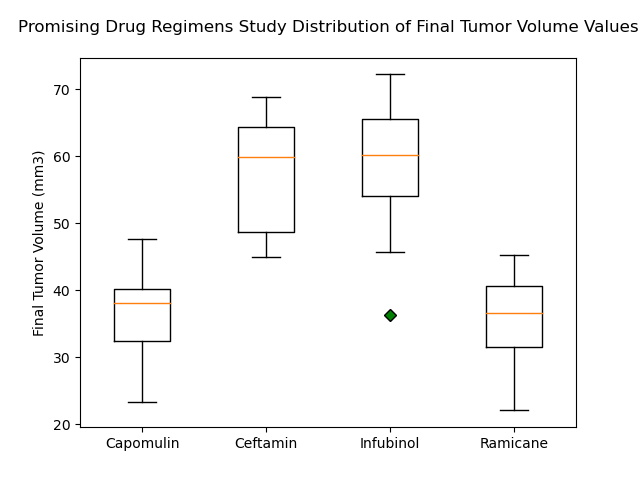

In [59]:
data = [capomulin_data, ceftamin_data, infubinol_data, ramicane_data]
green_diamond = dict(markerfacecolor='g', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title("Promising Drug Regimens Study Distribution of Final Tumor Volume Values\n")
ax7.boxplot(data, flierprops=green_diamond)
ax7.set_xticklabels(["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
ax7.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [60]:
# For convenience
df3 = mouse_study_dedupe_df
mouse_id_selected = "g316"

# Create dataframe subset for Mouse ID g316 and Capomulin Regimen Study
capomulin_study1_df = df3.loc[(df3["Drug Regimen"] == "Capomulin") & (df3["Mouse ID"] == mouse_id_selected)]
capomulin_study1_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
351     g316    Capomulin  Female          22          22          0   
352     g316    Capomulin  Female          22          22          5   
353     g316    Capomulin  Female          22          22         10   
354     g316    Capomulin  Female          22          22         15   
355     g316    Capomulin  Female          22          22         20   

     Tumor Volume (mm3)  Metastatic Sites  
351           45.000000                 0  
352           44.022752                 0  
353           44.502042                 0  
354           45.216743                 0  
355           45.933322                 1

In [61]:
# Line graph source dataset
g316_tumor_progression = capomulin_study1_df.set_index("Timepoint")["Tumor Volume (mm3)"]
g316_tumor_progression_df = pd.DataFrame(g316_tumor_progression)
g316_tumor_progression_df.head()

Tumor Volume (mm3)
Timepoint                    
0                   45.000000
5                   44.022752
10                  44.502042
15                  45.216743
20                  45.933322

<IPython.core.display.Javascript object>


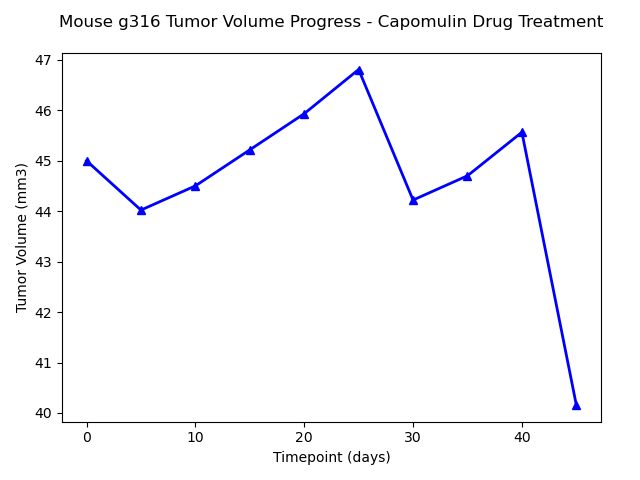

In [62]:
# INSTRUCTION: Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
g316_tumor_progression_lineplot = g316_tumor_progression_df.plot.line(style=['b^-',], linewidth=2.0, legend=False)

# Label and further format
plt.xlabel("Timepoint (days)") 
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse g316 Tumor Volume Progress - Capomulin Drug Treatment\n")
plt.tight_layout()

In [63]:
# INSTRUCTION: Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [64]:
avg_tumor_volume_by_drug_by_mouse_df = pd.DataFrame(tumor_volume_by_drug_avg_for_mouse)

# For convenience
df005 = avg_tumor_volume_by_drug_by_mouse_df

# Rename column header Timepoint to Max Timepoint
df005 = df005.rename(columns={"Age_months": "Avg Age (mos)", "Weight (g)": "Avg Weight (g)", \
                              "Timepoint": "Avg Days", "Tumor Volume (mm3)": "Avg TumorVol (mm3)", \
                             "Metastatic Sites": "Avg Metastatic Sites"})

df005 = df005.reset_index()
df006 = df005.loc[df005["Drug Regimen"] == "Capomulin"]
df006.head()

Drug Regimen Mouse ID  Avg Age (mos)  Avg Weight (g)  Avg Days  \
0    Capomulin     b128            9.0            22.0      22.5   
1    Capomulin     b742            7.0            21.0      22.5   
2    Capomulin     f966           16.0            17.0      10.0   
3    Capomulin     g288            3.0            19.0      22.5   
4    Capomulin     g316           22.0            22.0      22.5   

   Avg TumorVol (mm3)  Avg Metastatic Sites  
0           41.963636                   0.7  
1           40.083699                   0.0  
2           36.505973                   0.0  
3           41.990097                   0.8  
4           44.613344                   1.0

In [65]:
# Scatter plot graph source dataset
capomulin_weight_tumor_vol_data = df006[["Avg TumorVol (mm3)", "Avg Weight (g)"]]
capomulin_weight_tumor_vol_data.head()

Avg TumorVol (mm3)  Avg Weight (g)
0           41.963636            22.0
1           40.083699            21.0
2           36.505973            17.0
3           41.990097            19.0
4           44.613344            22.0

<IPython.core.display.Javascript object>


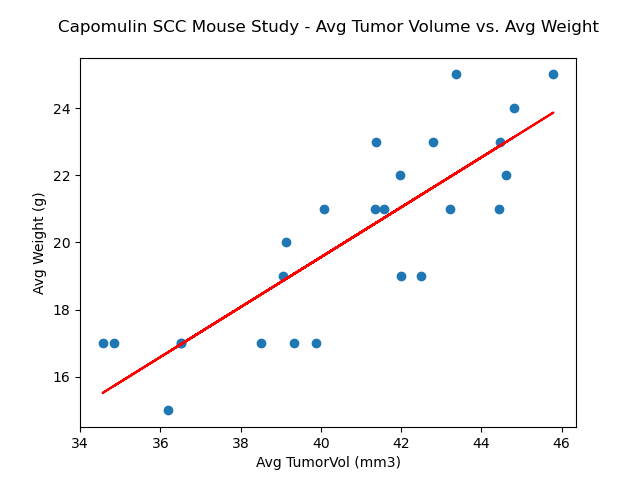

In [66]:
capomulin_weight_tumor_vol_data.plot(kind="scatter", \
                                     x="Avg TumorVol (mm3)", \
                                     y="Avg Weight (g)", \
                                     title="Capomulin SCC Mouse Study - Avg Tumor Volume vs. Avg Weight\n",
                                     c="Blue")

## Correlation and Regression

In [67]:
# INSTRUCTION: Add the linear regression equation and line to plot
# NOTE: I haven't yet determined why the 
x_values = capomulin_weight_tumor_vol_data["Avg TumorVol (mm3)"]
y_values = capomulin_weight_tumor_vol_data["Avg Weight (g)"]
(ms_slope, ms_intercept, ms_rvalue, ms_pvalue, ms_stderr) = linregress(x_values, y_values)
regress_values = x_values * ms_slope + ms_intercept
line_eq = (f"y = {round(ms_slope,2)}x + {round(ms_intercept,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Avg TumorVol (mm3)")
plt.ylabel("Avg Weight (g)")
plt.show()

In [68]:
# INSTRUCTION: Calculate the correlation coefficient
#     for mouse weight and average tumor volume for the Capomulin regimen

capomulin_weight_tumor_vol_data.corr(method='pearson')

Avg TumorVol (mm3)  Avg Weight (g)
Avg TumorVol (mm3)            1.000000        0.841936
Avg Weight (g)                0.841936        1.000000

In [69]:
# INSTRUCTION: Calculate the linear regression model 
#     for mouse weight and average tumor volume for the Capomulin regimen

print(f"The Equation of a Line is defined by the following formula: y = mx + b")
print(f"    where y is the Dependent Variable")
print(f"    where x is the Independent Variable")
print(f"    where m is the Slope, and")
print(f"    where b is the y-Axis Intercept")
print()
print(f"The Linear Regression Model we derived is as follows: {line_eq}")
print(f"    where the Dependent and Independent Variables are positively correlated.")

The Equation of a Line is defined by the following formula: y = mx + b
    where y is the Dependent Variable
    where x is the Independent Variable
    where m is the Slope, and
    where b is the y-Axis Intercept

The Linear Regression Model we derived is as follows: y = 0.74x + -10.15
    where the Dependent and Independent Variables are positively correlated.
